# NSL_KDD dataset

# libraries import

In [202]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import normalize, minmax_scale
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

# DATA IMPORTATION

In [203]:
#importing the dataset
train=pd.read_csv('data/KDDTrain+.txt')
train.head(10)






,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.0,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,205,12,0.0,0.0,1.0,1.0,0.06,0.06,0.00,255,12,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [204]:
#importing the dataset
test=pd.read_csv('data/KDDTest+.txt')
test.head(10)

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,229,10,0.00,0.00.1,1.00,1.00.1,0.04,0.06,0.00.2,255,10.1,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
5,0,tcp,smtp,SF,1022,387,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3,0.0,0.00,0.0,0.0,1.00,0.00,1.00,255,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
6,0,tcp,telnet,SF,129,174,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
7,0,tcp,http,SF,327,467,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,33,47,0.0,0.00,0.0,0.0,1.00,0.00,0.04,151,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
8,0,tcp,ftp,SF,26,157,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,52,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7
9,0,tcp,telnet,SF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,255,128,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,mscan,9


## Analysing Data


In [205]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   0         125972 non-null  int64  
 1   tcp       125972 non-null  object 
 2   ftp_data  125972 non-null  object 
 3   SF        125972 non-null  object 
 4   491       125972 non-null  int64  
 5   0.1       125972 non-null  int64  
 6   0.2       125972 non-null  int64  
 7   0.3       125972 non-null  int64  
 8   0.4       125972 non-null  int64  
 9   0.5       125972 non-null  int64  
 10  0.6       125972 non-null  int64  
 11  0.7       125972 non-null  int64  
 12  0.8       125972 non-null  int64  
 13  0.9       125972 non-null  int64  
 14  0.10      125972 non-null  int64  
 15  0.11      125972 non-null  int64  
 16  0.12      125972 non-null  int64  
 17  0.13      125972 non-null  int64  
 18  0.14      125972 non-null  int64  
 19  0.15      125972 non-null  int64  
 20  0.16

In [206]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        22543 non-null  int64  
 1   tcp      22543 non-null  object 
 2   private  22543 non-null  object 
 3   REJ      22543 non-null  object 
 4   0.1      22543 non-null  int64  
 5   0.2      22543 non-null  int64  
 6   0.3      22543 non-null  int64  
 7   0.4      22543 non-null  int64  
 8   0.5      22543 non-null  int64  
 9   0.6      22543 non-null  int64  
 10  0.7      22543 non-null  int64  
 11  0.8      22543 non-null  int64  
 12  0.9      22543 non-null  int64  
 13  0.10     22543 non-null  int64  
 14  0.11     22543 non-null  int64  
 15  0.12     22543 non-null  int64  
 16  0.13     22543 non-null  int64  
 17  0.14     22543 non-null  int64  
 18  0.15     22543 non-null  int64  
 19  0.16     22543 non-null  int64  
 20  0.17     22543 non-null  int64  
 21  0.18     225

In [207]:
train.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,0,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,20
count,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,45567.100824,19779.271433,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.000000,0.000008,0.009423,84.108207,27.738093,0.284487,0.282488,0.119959,0.121184,0.660925,0.063053,0.097322,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5870354.480801,4021285.112114,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.000000,0.002817,0.096613,114.508828,72.636092,0.446457,0.447024,0.320437,0.323648,0.439624,0.180315,0.259831,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,276.000000,516.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1379963888.000000,1309937401.000000,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [208]:
train.shape

(125972, 43)

In [209]:
train.shape

(125972, 43)

In [210]:
train.isna().sum()

0           0
tcp         0
ftp_data    0
SF          0
491         0
0.1         0
0.2         0
0.3         0
0.4         0
0.5         0
0.6         0
0.7         0
0.8         0
0.9         0
0.10        0
0.11        0
0.12        0
0.13        0
0.14        0
0.15        0
0.16        0
0.18        0
2           0
2.1         0
0.00        0
0.00.1      0
0.00.2      0
0.00.3      0
1.00        0
0.00.4      0
0.00.5      0
150         0
25          0
0.17        0
0.03        0
0.17.1      0
0.00.6      0
0.00.7      0
0.00.8      0
0.05        0
0.00.9      0
normal      0
20          0
dtype: int64

# Data cleaning
columns treatments(add,delete,modify)

In [211]:
# #removing the last column
train=train.iloc[:,0:42]

#naming the attributes
train.columns=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land'
                                        ,'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
                                      'root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
                                     'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
                                       'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
                                      'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
                                     'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
                                     'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
                                      'dst_host_srv_rerror_rate','label']
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [212]:
# #removing the last column
test=test.iloc[:,0:42]

#naming the attributes
test.columns=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land'
                                        ,'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
                                      'root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
                                     'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
                                       'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
                                      'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
                                     'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
                                     'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
                                      'dst_host_srv_rerror_rate','label']
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal


# Preprocessing
classification binaire(dos=1,>dos=0)

In [213]:
print('Training set:')
for col_name in train.columns:
    if train[col_name].dtypes == 'object' :
        unique_cat = len(train[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))








Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories


In [214]:
print('Testing set:')
for col_name in test.columns:
    if test[col_name].dtypes == 'object' :
        unique_cat = len(test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Testing set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 38 categories


In [215]:
#print(train['service'].count_values())
if test['service'].dtypes == 'object' :
 unique_cat = test['service'].unique()   
 print(unique_cat)

['private' 'ftp_data' 'eco_i' 'telnet' 'http' 'smtp' 'ftp' 'ldap' 'pop_3'
 'courier' 'discard' 'ecr_i' 'imap4' 'domain_u' 'mtp' 'systat' 'iso_tsap'
 'other' 'csnet_ns' 'finger' 'uucp' 'whois' 'netbios_ns' 'link' 'Z39_50'
 'sunrpc' 'auth' 'netbios_dgm' 'uucp_path' 'vmnet' 'domain' 'name' 'pop_2'
 'http_443' 'urp_i' 'login' 'gopher' 'exec' 'time' 'remote_job' 'ssh'
 'kshell' 'sql_net' 'shell' 'hostnames' 'echo' 'daytime' 'pm_dump' 'IRC'
 'netstat' 'ctf' 'nntp' 'netbios_ssn' 'tim_i' 'supdup' 'bgp' 'nnsp' 'rje'
 'printer' 'efs' 'X11' 'ntp_u' 'klogin' 'tftp_u']


In [216]:
#print(train['service'].count_values())
if train['service'].dtypes == 'object' :
 unique_cat = train['service'].unique()   
 print(unique_cat)

['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']


<Axes: xlabel='count', ylabel='service'>

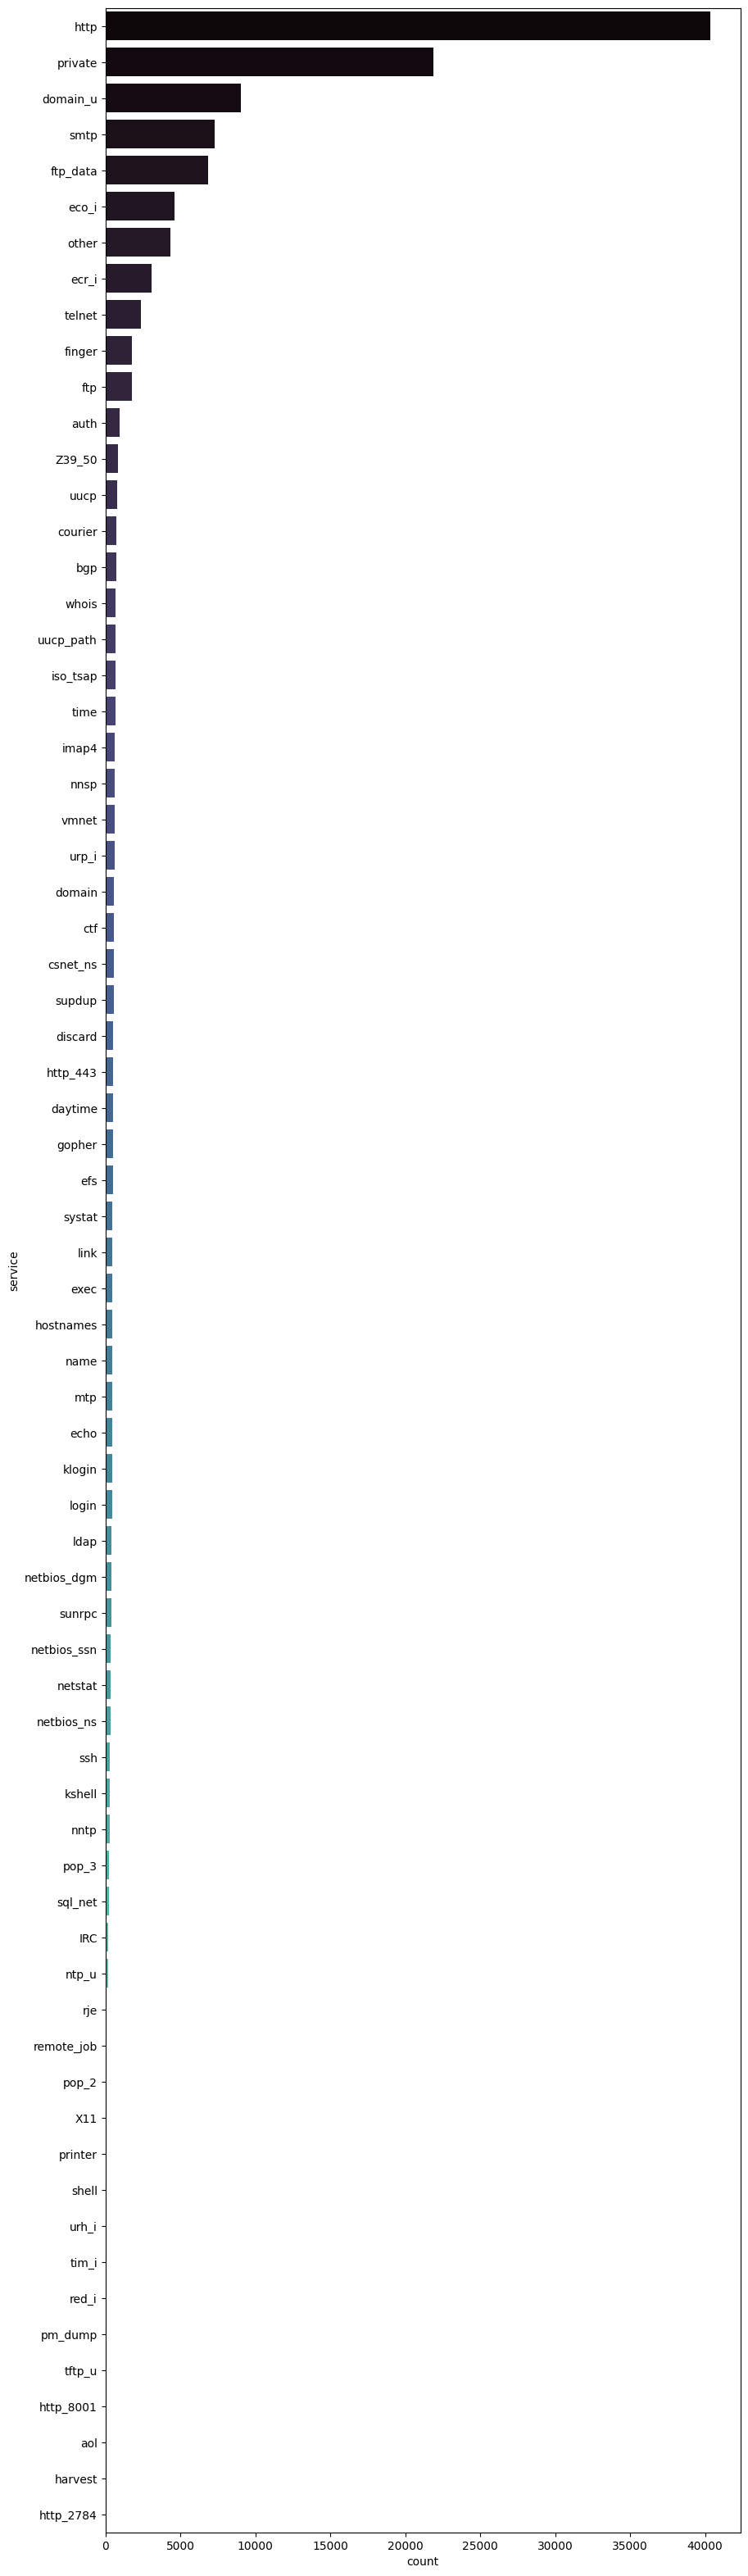

In [217]:
plt.figure(figsize=(10,40))
sns.countplot(palette='mako', y='service' , data=train, order = train['service'].value_counts().index)

In [218]:
if train['flag'].dtypes == 'object' :
 unique_cat = train['flag'].unique()   
 print(unique_cat)

['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']


<Axes: xlabel='flag', ylabel='count'>

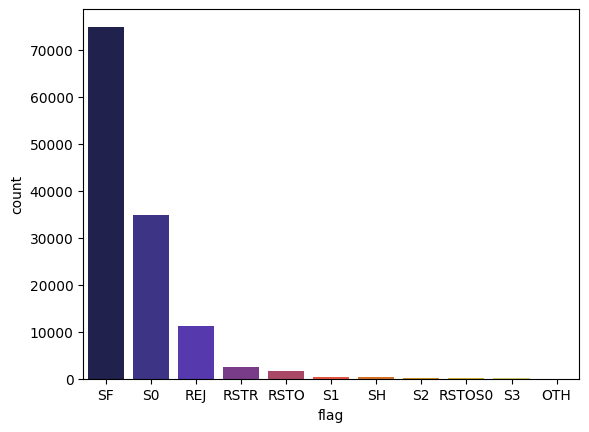

In [219]:
sns.barplot(x=train['flag'].value_counts().index, y=train['flag'].value_counts(), palette='CMRmap')


In [220]:
if train['protocol_type'].dtypes == 'object' :
 unique_cat = train['protocol_type'].unique()   
 print(unique_cat)

['udp' 'tcp' 'icmp']


<Axes: xlabel='protocol_type', ylabel='count'>

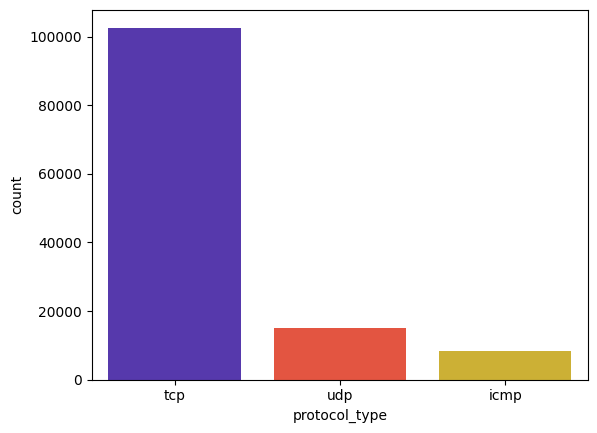

In [221]:
sns.barplot(x=train['protocol_type'].value_counts().index, y=train['protocol_type'].value_counts(), palette='CMRmap')


In [222]:
if train['label'].dtypes == 'object' :
 unique_cat = train['label'].unique()   
 print(unique_cat)

['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']


In [223]:
if test['label'].dtypes == 'object' :
 unique_cat = test['label'].unique()   
 print(unique_cat)

['neptune' 'normal' 'saint' 'mscan' 'guess_passwd' 'smurf' 'apache2'
 'satan' 'buffer_overflow' 'back' 'warezmaster' 'snmpgetattack'
 'processtable' 'pod' 'httptunnel' 'nmap' 'ps' 'snmpguess' 'ipsweep'
 'mailbomb' 'portsweep' 'multihop' 'named' 'sendmail' 'loadmodule' 'xterm'
 'worm' 'teardrop' 'rootkit' 'xlock' 'perl' 'land' 'xsnoop' 'sqlattack'
 'ftp_write' 'imap' 'udpstorm' 'phf']


In [224]:
set1 = {'normal' ,'neptune' ,'warezclient', 'ipsweep', 'portsweep', 'teardrop', 'nmap',
 'satan', 'smurf' ,'pod', 'back' ,'guess_passwd', 'ftp_write' ,'multihop',
 'rootkit' ,'buffer_overflow', 'imap' ,'warezmaster' ,'phf' ,'land',
 'loadmodule' ,'spy' ,'perl'}
set2 = {'neptune' ,'normal' ,'saint', 'mscan', 'guess_passwd', 'smurf', 'apache2',
 'satan' ,'buffer_overflow', 'back', 'warezmaster' ,'snmpgetattack',
 'processtable', 'pod', 'httptunnel', 'nmap' ,'ps' ,'snmpguess' ,'ipsweep',
 'mailbomb', 'portsweep', 'multihop', 'named', 'sendmail', 'loadmodule' ,'xterm',
 'worm' ,'teardrop', 'rootkit', 'xlock' ,'perl', 'land' ,'xsnoop', 'sqlattack',
 'ftp_write' ,'imap', 'udpstorm', 'phf'}
set3 = set1.union(set2)
print(set3)

{'saint', 'guess_passwd', 'ipsweep', 'teardrop', 'xterm', 'multihop', 'normal', 'ftp_write', 'xlock', 'perl', 'buffer_overflow', 'snmpgetattack', 'portsweep', 'mailbomb', 'phf', 'spy', 'land', 'apache2', 'rootkit', 'imap', 'xsnoop', 'sendmail', 'worm', 'warezmaster', 'mscan', 'warezclient', 'back', 'udpstorm', 'loadmodule', 'satan', 'snmpguess', 'neptune', 'smurf', 'processtable', 'named', 'sqlattack', 'ps', 'pod', 'httptunnel', 'nmap'}


# 1-N Encoding

In [225]:
train['protocol_type'].replace({ 'udp' : 0, 'tcp' : 1 ,'icmp': 2 },inplace = True)
train['flag'].replace({ 'OTH' : 0, 'REJ' : 1 ,'RSTO': 2 ,'RSTOS0':3 ,'RSTR': 4,'S0':5,
                           'S1':6,'S2':7, 'S3':8, 'SF':9,'SH':10 },inplace = True)
train['service'].replace({ 'other':0,'private':1,'http':2,'remote_job':3,'ftp_data':4,'name':5,'netbios_ns':6,'eco_i':7,'mtp':8,
    'telnet':9,'finger':10,'domain_u':11,'supdup':12, 'uucp_path':13,'Z39_50':14,'smtp':15,'csnet_ns':16,'uucp':17,'netbios_dgm':18,'urp_i':19,
    'auth':20,'domain':21,'ftp':22,'bgp':23,'ldap':24,'ecr_i':25,'gopher':26, 'vmnet':27,'systat':28,'http_443':29,
    'efs':30,'whois':31,'imap4':32,'iso_tsap':33,'echo':34,'klogin':35,'link':36,'sunrpc':37,'login':38,'kshell':39,
    'sql_net':40,'time':41,'hostnames':42,'exec':43,'ntp_u':44,'discard':45,'nntp':46,'courier':47,'ctf':48,'ssh':49,
    'daytime':50,'shell':51,'netstat':52,'pop_3':53,'nnsp':54,'IRC':55,'pop_2':56,'printer':57,'tim_i':58,'pm_dump':59,'red_i':60,
    'netbios_ssn':61,'rje':62,'X11':63,'urh_i':64,'http_8001':65,'aol':66,'http_2784':67,'tftp_u':68,'harvest':69},inplace = True)

In [226]:
test['protocol_type'].replace({ 'udp' : 0, 'tcp' : 1 ,'icmp': 2 },inplace = True)
test['flag'].replace({ 'OTH' : 0, 'REJ' : 1 ,'RSTO': 2 ,'RSTOS0':3 ,'RSTR': 4,'S0':5,
                           'S1':6,'S2':7, 'S3':8, 'SF':9,'SH':10 },inplace = True)
test['service'].replace({ 'other':0,'private':1,'http':2,'remote_job':3,'ftp_data':4,'name':5,'netbios_ns':6,'eco_i':7,'mtp':8,
    'telnet':9,'finger':10,'domain_u':11,'supdup':12, 'uucp_path':13,'Z39_50':14,'smtp':15,'csnet_ns':16,'uucp':17,'netbios_dgm':18,'urp_i':19,
    'auth':20,'domain':21,'ftp':22,'bgp':23,'ldap':24,'ecr_i':25,'gopher':26, 'vmnet':27,'systat':28,'http_443':29,
    'efs':30,'whois':31,'imap4':32,'iso_tsap':33,'echo':34,'klogin':35,'link':36,'sunrpc':37,'login':38,'kshell':39,
    'sql_net':40,'time':41,'hostnames':42,'exec':43,'ntp_u':44,'discard':45,'nntp':46,'courier':47,'ctf':48,'ssh':49,
    'daytime':50,'shell':51,'netstat':52,'pop_3':53,'nnsp':54,'IRC':55,'pop_2':56,'printer':57,'tim_i':58,'pm_dump':59,'red_i':60,
    'netbios_ssn':61,'rje':62,'X11':63,'urh_i':64,'http_8001':65,'aol':66,'http_2784':67,'tftp_u':68,'harvest':69},inplace = True)

In [227]:
# train['label'].replace({ 'teardrop':1, 'back':1, 'smurf':1, 'udpstorm':1, 'apache2':1, 'pod':1, 'land':1, 'mailbomb':1, 'processtable':1, 'nmap':1,                                           
#   'phf':0, 'xsnoop':0, 'worm':0, 'satan':0, 'buffer_overflow':0, 'named':0, 'perl':0, 'saint':0, 'guess_passwd':0,
# 'ipsweep':0, 'multihop':0, 'imap':0, 'mscan':0, 'loadmodule':0, 'ftp_write':0, 'rootkit':0, 'snmpguess':0, 'sendmail':0, 'warezmaster':0,
#     'normal':0, 'portsweep':0, 'snmpgetattack':0, 'sqlattack':0, 'httptunnel':0, 'ps':0, 'spy':0, 'xterm':0, 'warezclient':0,
#       'neptune':1  },inplace = True)

train['label'].replace({ 
'sendmail':0, 'mailbomb':0, 'imap':0, 'neptune':1, 'rootkit':0, 'back':0, 'udpstorm':1, 'phf':0, 'ftp_write':0,
'guess_passwd':0, 'pod':1, 'mscan':0, 'land':1, 'teardrop':1, 'sqlattack':0, 'named':0, 'warezmaster':0, 'multihop':0, 'loadmodule':0, 
'ps':0, 'warezclient':0, 'worm':0, 'snmpgetattack':0, 'httptunnel':0, 'portsweep':0, 'normal':0, 'perl':0, 'buffer_overflow':0, 'xlock':0, 
'ipsweep':0, 'apache2':1, 'processtable':0, 'xterm':0, 'spy':0, 'snmpguess':0, 'nmap':0, 'smurf':1, 'saint':1, 'xsnoop':0, 'satan':0
  },inplace = True)


test['label'].replace({ 
'sendmail':0, 'mailbomb':0, 'imap':0, 'neptune':1, 'rootkit':0, 'back':0, 'udpstorm':1, 'phf':0, 'ftp_write':0,
'guess_passwd':0, 'pod':1, 'mscan':0, 'land':1, 'teardrop':1, 'sqlattack':0, 'named':0, 'warezmaster':0, 'multihop':0, 'loadmodule':0, 
'ps':0, 'warezclient':0, 'worm':0, 'snmpgetattack':0, 'httptunnel':0, 'portsweep':0, 'normal':0, 'perl':0, 'buffer_overflow':0, 'xlock':0, 
'ipsweep':0, 'apache2':1, 'processtable':0, 'xterm':0, 'spy':0, 'snmpguess':0, 'nmap':0, 'smurf':1, 'saint':1, 'xsnoop':0, 'satan':0
  },inplace = True)
train.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,0,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.00,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
1,0,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.00,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
2,0,1,2,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.20,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
3,0,1,2,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.00,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.00,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
5,0,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.00,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
6,0,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.00,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,1
7,0,1,3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.00,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
8,0,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.00,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1
9,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,205,12,0.0,0.00,1.0,1.0,0.06,0.06,0.00,255,12,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1


In [228]:
counts = train["service"].value_counts()
print(counts)

service
2     40338
1     21853
11     9043
15     7313
4      6859
      ...  
68        3
65        2
66        2
69        2
67        1
Name: count, Length: 70, dtype: int64


In [229]:
train.shape


(125972, 42)

Balancing the label

In [230]:
train['label'].value_counts()

label
0    81001
1    44971
Name: count, dtype: int64

In [231]:
test['label'].value_counts()

label
0    16104
1     6439
Name: count, dtype: int64

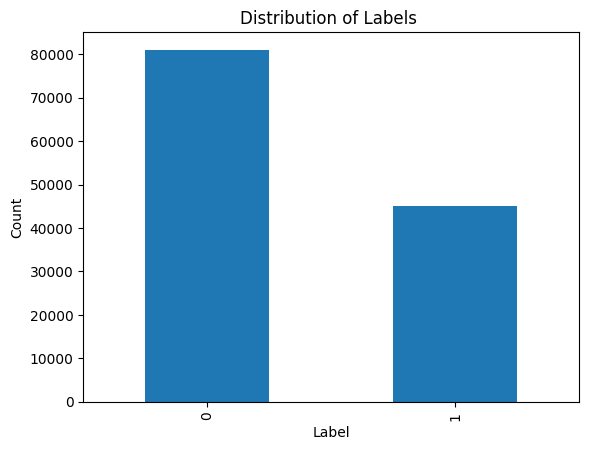

In [232]:
#before balancing the label
import matplotlib.pyplot as plt

# plot the distribution of the 'label' column before balancing
train['label'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels ')
plt.show()


<Axes: >

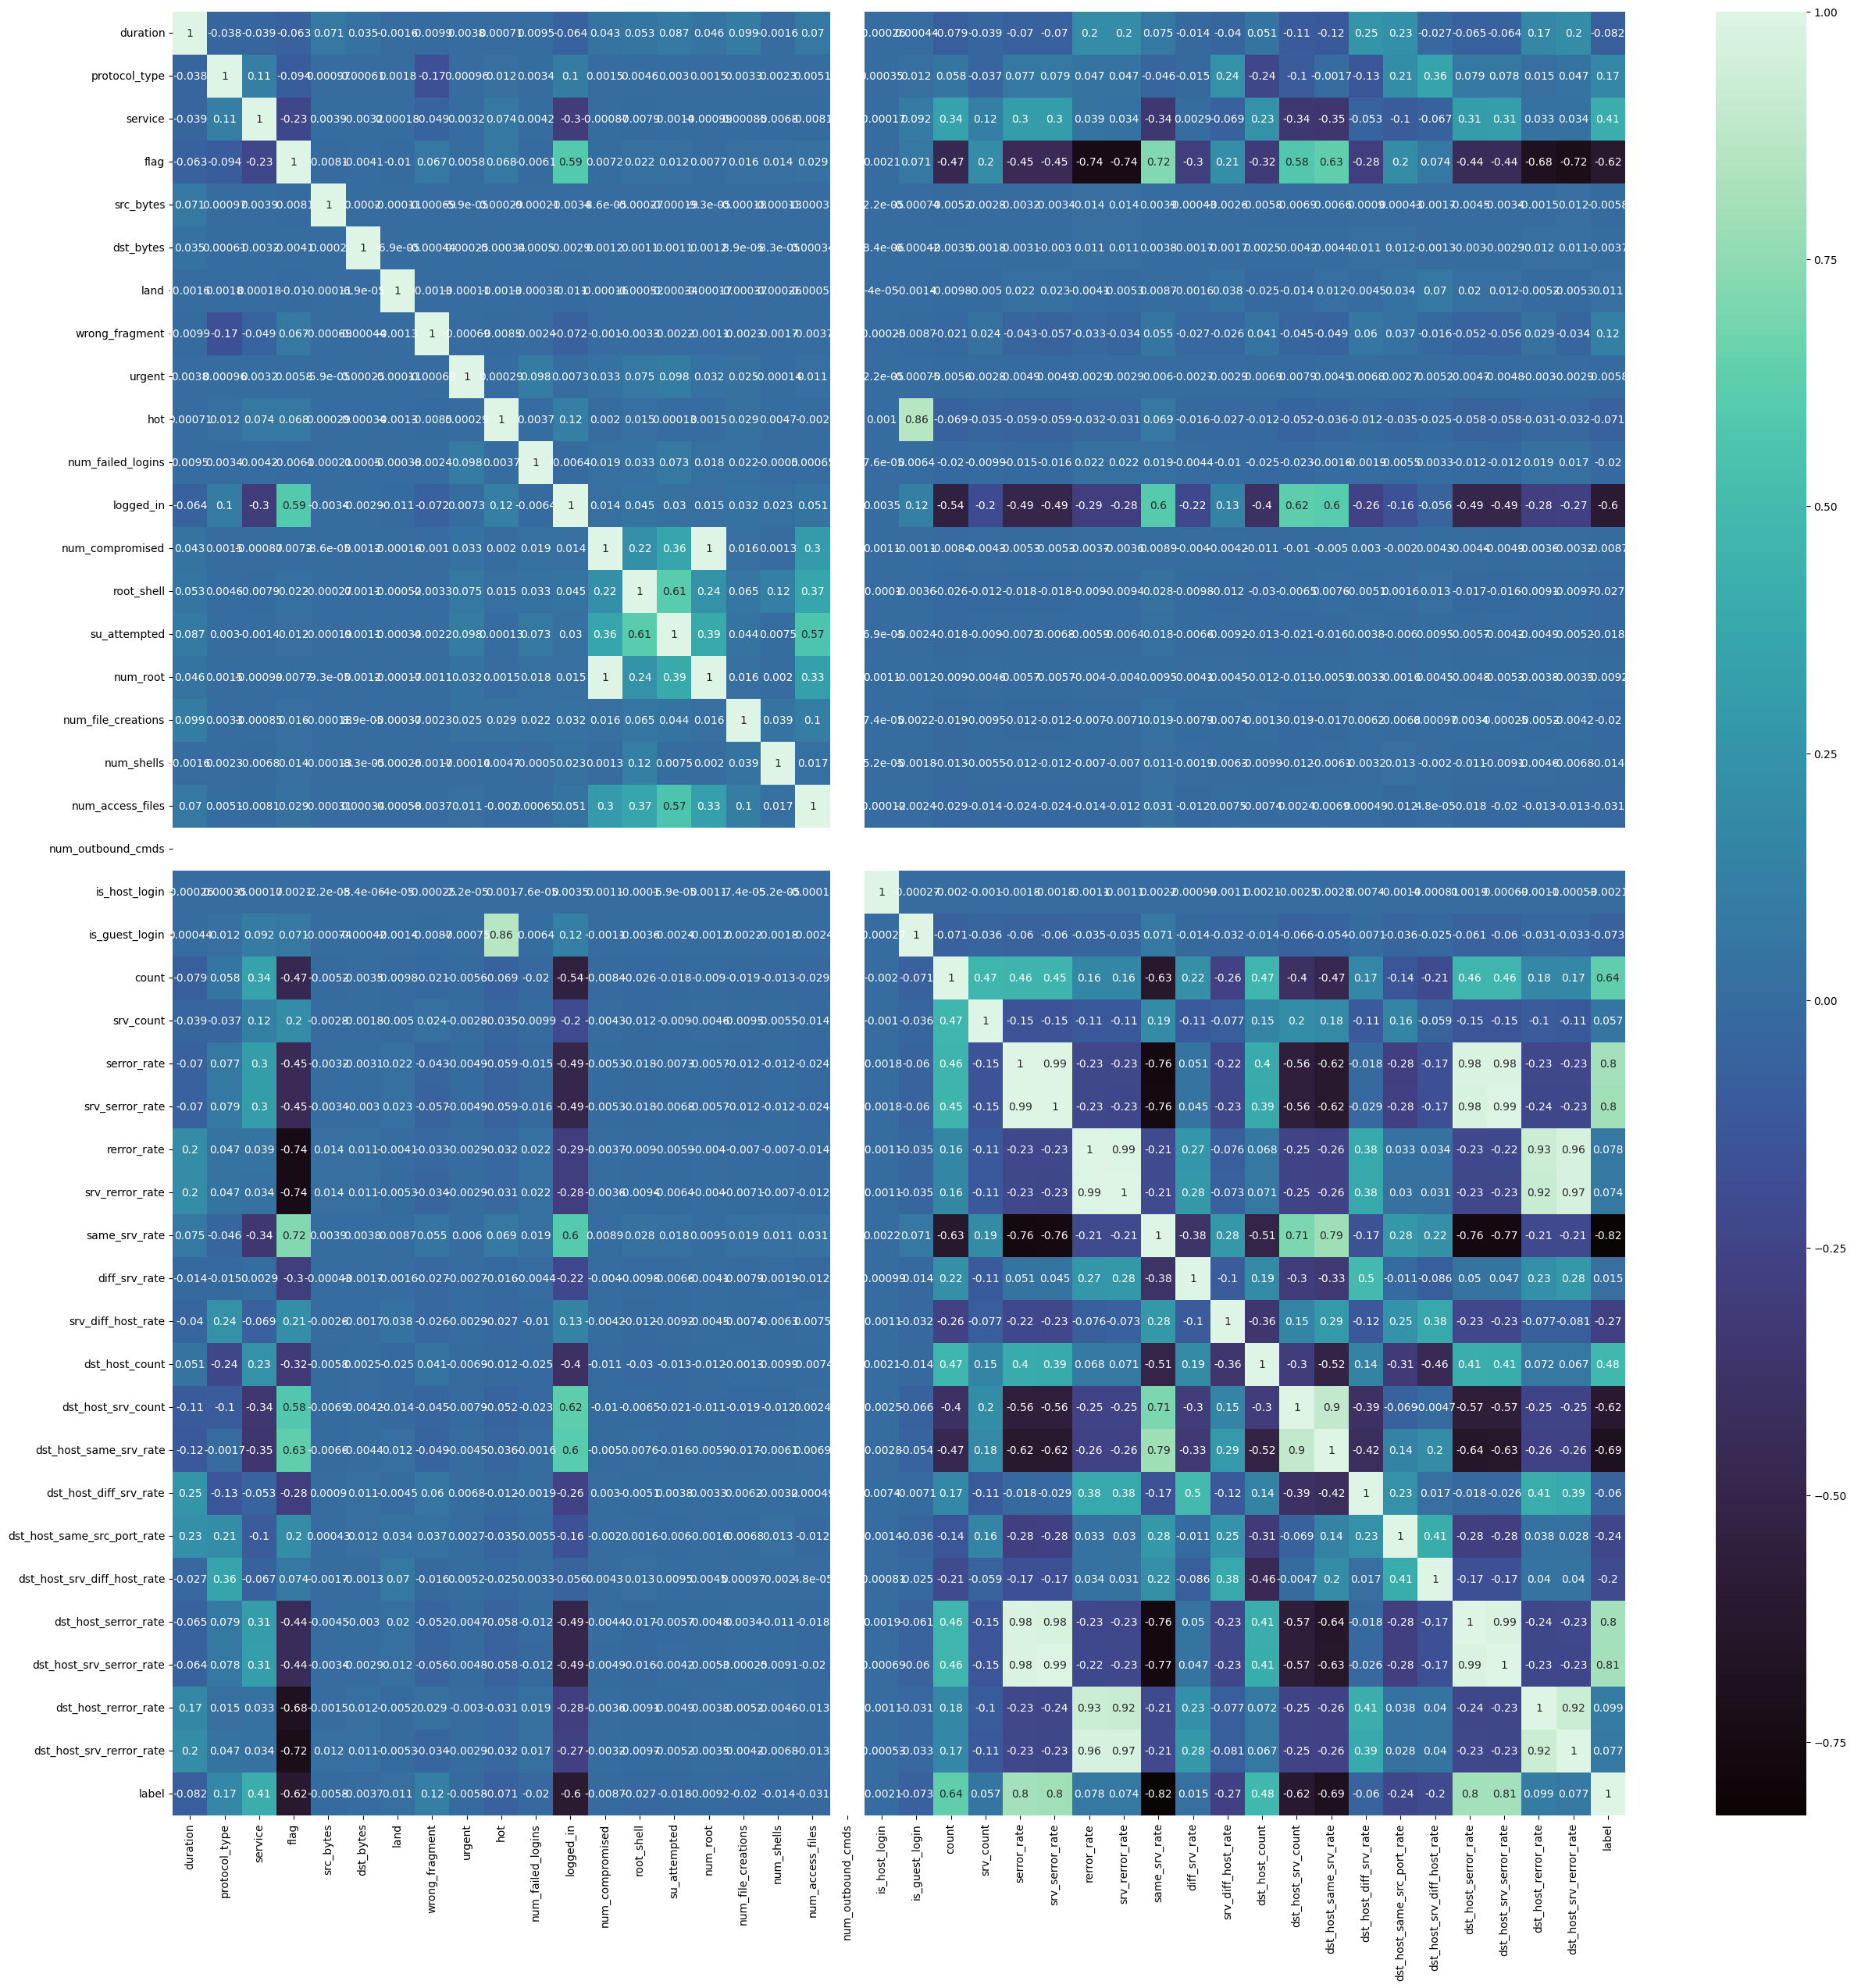

In [233]:
#apres encoding 
plt.figure(figsize=(30,30))
sns.heatmap(train.corr(), annot= True,cmap='mako')

Separate features and label

In [234]:
y_train = train.iloc[:, -1]  # select the last column (label) as y_train
x_train = train.iloc[:, :-1]  # select all columns except the last one as x_train

y_test = test.iloc[:, -1]  # select the last column (label) as y_test
x_test = test.iloc[:, :-1]  # select all columns except the last one as x_test

print(x_train.shape)
print(y_train.shape)

print(x_train.head())
print(y_train.head())




(125972, 41)
(125972,)
   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              0        0     9        146          0     0   
1         0              1        1     5          0          0     0   
2         0              1        2     9        232       8153     0   
3         0              1        2     9        199        420     0   
4         0              1        1     1          0          0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          1                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          0                0   

   root_shell  su_attempted  num_root  num_file_cre

# training the model
Train data with one or more chosen classification algorithms (DecisionTrees, SVM, KNN, Naive bayes, Logistic regression ...)

                                        Accuracy  Precision    Recall  \
 DecisionTreeClassifier                 0.949918   0.959661  0.860848   
RandomForestClassifier                  0.943308   0.959082  0.837242   
RandomForestClassifier With parameters  0.942332   0.959249  0.833515   
LogisticRegression                      0.932085   0.926931  0.827458   
Naive Bayes Classifier                  0.519097   0.365151  0.925610   

                                        F1 Score              Confusion Matrix  
 DecisionTreeClassifier                 0.907573   [[15871, 233], [896, 5543]]  
RandomForestClassifier                  0.894030  [[15874, 230], [1048, 5391]]  
RandomForestClassifier With parameters  0.891973  [[15876, 228], [1072, 5367]]  
LogisticRegression                      0.874374  [[15684, 420], [1111, 5328]]  
Naive Bayes Classifier                  0.523703  [[5742, 10362], [479, 5960]]  


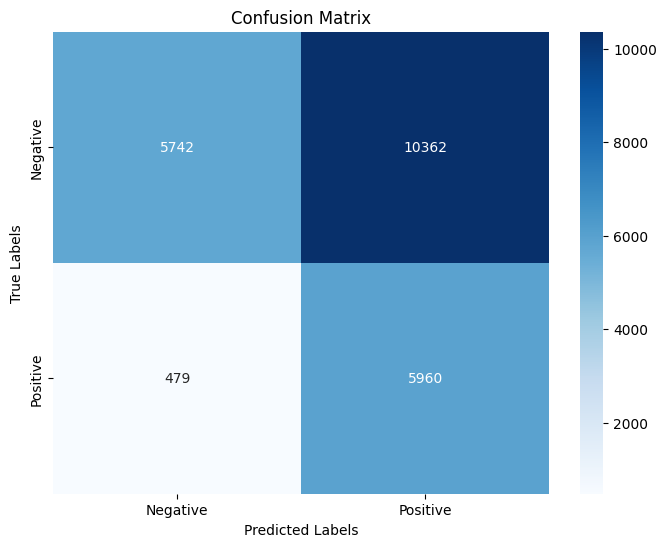

False Alarm Rate: 0.6434426229508197


In [235]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from joblib import dump
from sklearn.naive_bayes import GaussianNB
# Step 1: Define list of models
models = [
      DecisionTreeClassifier(random_state=88),
    RandomForestClassifier(random_state=88),
    RandomForestClassifier(n_estimators=130,max_depth=30,min_samples_leaf=9 , random_state=88),
    LogisticRegression(max_iter=500),
    GaussianNB(),
]

# Step 2: Define dictionary to store evaluation metrics


i=0
# fit models and make predictions
#models = [Rf,Rf_best_param, dt, svm,svm_best_param,Lr,NB,kNN,kNN_best_param]
model_names = [' DecisionTreeClassifier ','RandomForestClassifier', 'RandomForestClassifier With parameters','LogisticRegression ','Naive Bayes Classifier']
results = []

for model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    Conf_Mat = confusion_matrix(y_test, y_pred)
    dump(model, model_names[i]+' Normalization.joblib')
    i=i+1
    results.append([acc, prec, recall, f1,Conf_Mat])

# create dataframe with results
metrics_df_Columns_WN = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score','Confusion Matrix'], index=model_names)
print(metrics_df_Columns_WN)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = Conf_Mat 

# Create a figure and axis
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# Show the plot
plt.show()

# Calculate the confusion matrix
tn, fp, fn, tp = Conf_Mat.ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)


### results of the models

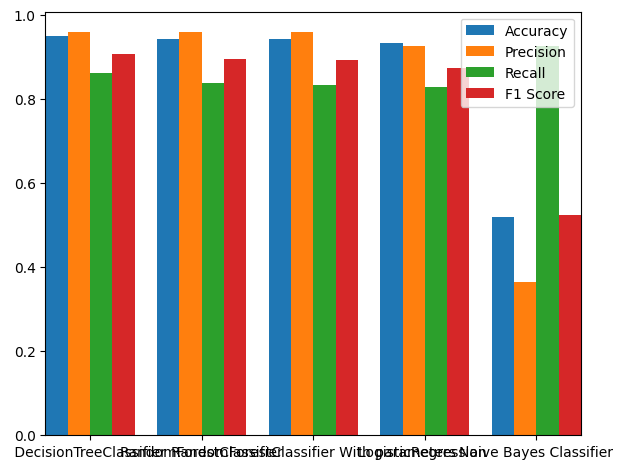

In [236]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the models and x-axis positions
models = model_names
x = np.arange(len(models))

# Define the width of each bar
width = 0.2

# Create the figure and axes
fig, ax = plt.subplots()

# Iterate over the columns
for i, column_name in enumerate(metrics_df_Columns_WN.columns[:-1]):  # Exclude the 'Frame' column
    values = metrics_df_Columns_WN[column_name]

    # Plot the bars for each column
    rects = ax.bar(x + (i - 1.5) * width, values, width, label=column_name)

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models)

# Add legend
ax.legend()

# Add spacing between models
ax.set_xlim(x[0] - width * 2, x[-1] + width * 2)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Logarithme scaling

# Normalisation

In [237]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
 
train=pd.DataFrame(scaler.fit_transform(train),
            columns=train.columns, index=train.index) 

test=pd.DataFrame(scaler.transform(test),
            columns=test.columns, index=test.index) 


y_train = train.iloc[:, -1]  # select the last column (label) as y_train
x_train = train.iloc[:, :-1]  # select all columns except the last one as x_train

y_test = test.iloc[:, -1]  # select the last column (label) as y_test
x_test = test.iloc[:, :-1]  # select all columns except the last one as x_test
    



train.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.0,0.0,0.000000,0.9,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025440,0.001957,0.0,0.00,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.0
1,0.0,0.5,0.014493,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.240705,0.011742,1.0,1.00,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1.0
2,0.0,0.5,0.028986,0.9,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009785,0.009785,0.2,0.20,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0.0
3,0.0,0.5,0.028986,0.9,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058708,0.062622,0.0,0.00,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
4,0.0,0.5,0.014493,0.1,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.236791,0.037182,0.0,0.00,1.0,1.0,0.16,0.06,0.00,1.000000,0.074510,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1.0
5,0.0,0.5,0.014493,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.324853,0.017613,1.0,1.00,0.0,0.0,0.05,0.06,0.00,1.000000,0.035294,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1.0
6,0.0,0.5,0.014493,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.228963,0.031311,1.0,1.00,0.0,0.0,0.14,0.06,0.00,1.000000,0.058824,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,1.0
7,0.0,0.5,0.043478,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.528376,0.045010,1.0,1.00,0.0,0.0,0.09,0.05,0.00,1.000000,0.090196,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1.0
8,0.0,0.5,0.014493,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.260274,0.015656,1.0,1.00,0.0,0.0,0.06,0.06,0.00,1.000000,0.050980,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1.0
9,0.0,0.5,0.014493,0.1,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.401174,0.023483,0.0,0.00,1.0,1.0,0.06,0.06,0.00,1.000000,0.047059,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1.0


In [238]:
# from sklearn.tree import plot_tree

# plt.figure(figsize=(20,10))
# plot_tree(dt, feature_names=x_train.columns, class_names=['0','1'], filled=True)
# plt.show()

In [239]:
# !pip install graphviz

In [240]:
# from sklearn.tree import export_graphviz
# dot_data=export_graphviz(dt,out_file='tree.dot',feature_names=x_train.columns,filled=True)

### Results

                                        Accuracy  Precision    Recall  \
 DecisionTreeClassifier                 0.950140   0.960492  0.860848   
RandomForestClassifier                  0.934747   0.957796  0.807113   
RandomForestClassifier With parameters  0.940026   0.959033  0.825283   
LogisticRegression                      0.943397   0.948722  0.847647   
Naive Bayes Classifier                  0.810451   0.618180  0.879795   

                                        F1 Score              Confusion Matrix  
 DecisionTreeClassifier                 0.907944   [[15876, 228], [896, 5543]]  
RandomForestClassifier                  0.876022  [[15875, 229], [1242, 5197]]  
RandomForestClassifier With parameters  0.887145  [[15877, 227], [1125, 5314]]  
LogisticRegression                      0.895341   [[15809, 295], [981, 5458]]  
Naive Bayes Classifier                  0.726142  [[12605, 3499], [774, 5665]]  


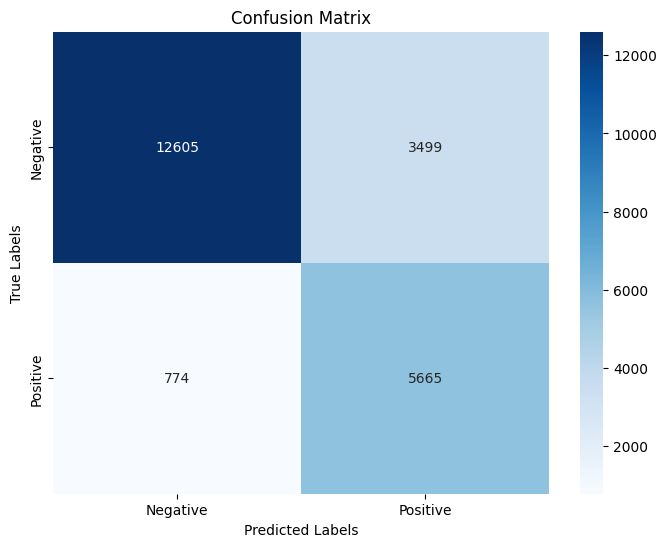

False Alarm Rate: 0.21727521112767015


In [241]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Step 1: Define list of models
models = [ 
    DecisionTreeClassifier(random_state=88),
    RandomForestClassifier(random_state=88),
    RandomForestClassifier(n_estimators=130,max_depth=30,min_samples_leaf=9 , random_state=88),
    LogisticRegression(max_iter=500),
    GaussianNB(),
]

# Step 2: Define dictionary to store evaluation metrics

results = []
i=0
# fit models and make predictions
#models = [Rf,Rf_best_param, dt, svm,svm_best_param,Lr,NB,kNN,kNN_best_param]
model_names = [' DecisionTreeClassifier ','RandomForestClassifier', 'RandomForestClassifier With parameters','LogisticRegression ','Naive Bayes Classifier']
results = []
for model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    Conf_Mat = confusion_matrix(y_test, y_pred)
    dump(model, model_names[i]+' Normalization.joblib')
    i=i+1
    results.append([acc, prec, recall, f1,Conf_Mat])

# create dataframe with results
metrics_df_Columns_N = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score','Confusion Matrix'], index=model_names)
print(metrics_df_Columns_N)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = Conf_Mat 

# Create a figure and axis
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# Show the plot
plt.show()

# Calculate the confusion matrix
tn, fp, fn, tp = Conf_Mat.ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)



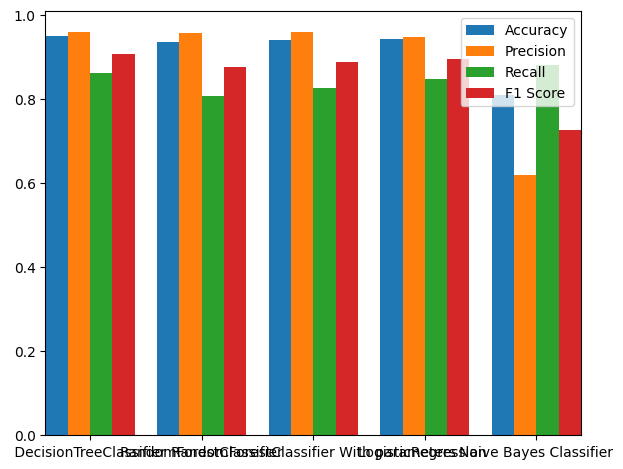

In [242]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the models and x-axis positions
models = model_names
x = np.arange(len(models))

# Define the width of each bar
width = 0.2

# Create the figure and axes
fig, ax = plt.subplots()

# Iterate over the columns
for i, column_name in enumerate(metrics_df_Columns_N.columns[:-1]):  # Exclude the 'Frame' column
    values = metrics_df_Columns_N[column_name]

    # Plot the bars for each column
    rects = ax.bar(x + (i - 1.5) * width, values, width, label=column_name)

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models)

# Add legend
ax.legend()

# Add spacing between models
ax.set_xlim(x[0] - width * 2, x[-1] + width * 2)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# features selection

## RandomForestClassifier feature selection+Classification

#### random forest

In [243]:
# # Load the dataset

from sklearn.feature_selection import SelectFromModel


# Import the required libraries
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest Classifier
sel =SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=88))

# Train the classifier using the training set
sel.fit(x_train, y_train)

# Get the feature importances
sel.get_support()
# Sort the features based on their importances in descending order
selected_fet=x_train.columns[(sel.get_support())]

print('nbr of features selected  ',len(selected_fet))

print(' features selected  ',selected_fet)





nbr of features selected   12
 features selected   Index(['service', 'flag', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate'],
      dtype='object')


                                        Accuracy  Precision    Recall  \
 DecisionTreeClassifier                 0.941667   0.929722  0.860848   
RandomForestClassifier                  0.947256   0.963781  0.847181   
RandomForestClassifier With parameters  0.947922   0.962248  0.851064   
LogisticRegression                      0.909684   0.891239  0.778848   
Naive Bayes Classifier                  0.881471   0.816183  0.755086   

                                        F1 Score  \
 DecisionTreeClassifier                 0.893960   
RandomForestClassifier                  0.901727   
RandomForestClassifier With parameters  0.903247   
LogisticRegression                      0.831261   
Naive Bayes Classifier                  0.784447   

                                                     Confusion Matrix  
 DecisionTreeClassifier                   [[15685, 419], [896, 5543]]  
RandomForestClassifier                    [[15899, 205], [984, 5455]]  
RandomForestClassifier With para

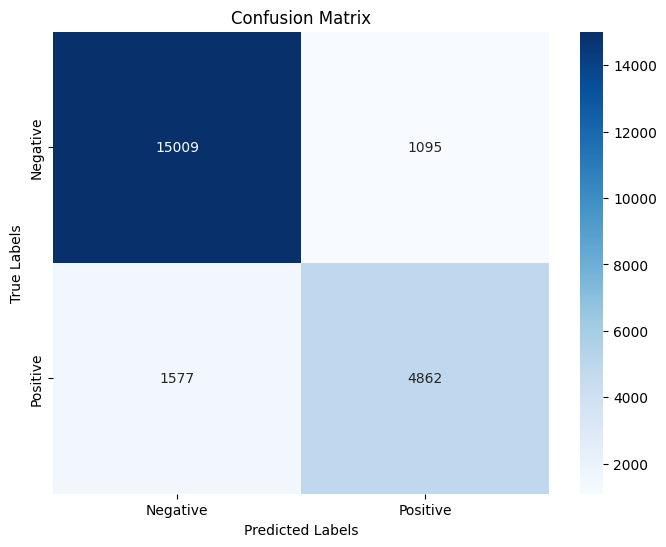

False Alarm Rate: 0.06799552906110283


In [244]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Step 1: Define list of models
models = [ 
    DecisionTreeClassifier(random_state=88),
    RandomForestClassifier(random_state=88),
    RandomForestClassifier(n_estimators=130,max_depth=30,min_samples_leaf=9 , random_state=88),
    LogisticRegression(max_iter=500),
    GaussianNB(),
]

# Step 2: Define dictionary to store evaluation metrics
# Step 2: Define dictionary to store evaluation metrics

results = []
i=0
# fit models and make predictions
#models = [Rf,Rf_best_param, dt, svm,svm_best_param,Lr,NB,kNN,kNN_best_param]
model_names = [' DecisionTreeClassifier ','RandomForestClassifier', 'RandomForestClassifier With parameters','LogisticRegression ','Naive Bayes Classifier']
results = []
for model in models:
    model.fit(x_train.loc[:, selected_fet],y_train)
    y_pred = model.predict(x_test.loc[:, selected_fet])
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    Conf_Mat = confusion_matrix(y_test, y_pred)
    dump(model, model_names[i]+' RF FeautureSelection.joblib')
    i=i+1
    results.append([acc, prec, recall, f1,Conf_Mat])

# create dataframe with results
metrics_df_Columns_RFF = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score','Confusion Matrix'], index=model_names)
print(metrics_df_Columns_RFF)


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = Conf_Mat 

# Create a figure and axis
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# Show the plot
plt.show()

# Calculate the confusion matrix
tn, fp, fn, tp = Conf_Mat.ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)



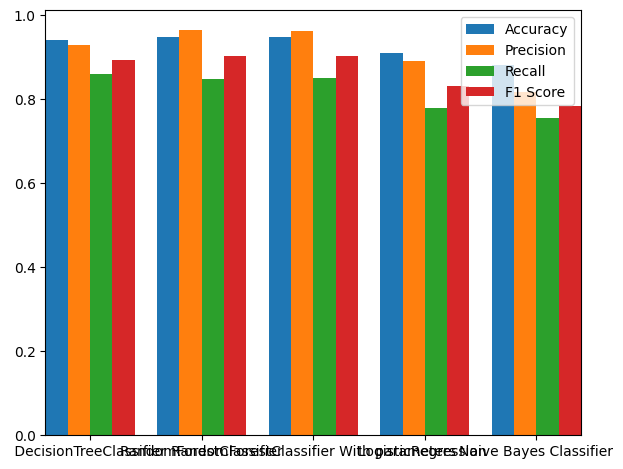

In [245]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the models and x-axis positions
models = model_names
x = np.arange(len(models))

# Define the width of each bar
width = 0.2

# Create the figure and axes
fig, ax = plt.subplots()

# Iterate over the columns
for i, column_name in enumerate(metrics_df_Columns_RFF.columns[:-1]):  
    values = metrics_df_Columns_RFF[column_name]

    # Plot the bars for each column
    rects = ax.bar(x + (i - 1.5) * width, values, width, label=column_name)

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models)

# Add legend
ax.legend()

# Add spacing between models
ax.set_xlim(x[0] - width * 2, x[-1] + width * 2)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## RFEClassifier feature selection(estimator=DT)+Classification

                                        Accuracy  Precision    Recall  \
 DecisionTreeClassifier                 0.950051   0.960000  0.861003   
RandomForestClassifier                  0.940469   0.958611  0.827302   
RandomForestClassifier With parameters  0.939227   0.958401  0.822954   
LogisticRegression                      0.945349   0.958282  0.845473   
Naive Bayes Classifier                  0.904050   0.878139  0.771082   

                                        F1 Score              Confusion Matrix  
 DecisionTreeClassifier                 0.907811   [[15873, 231], [895, 5544]]  
RandomForestClassifier                  0.888129  [[15874, 230], [1112, 5327]]  
RandomForestClassifier With parameters  0.885528  [[15874, 230], [1140, 5299]]  
LogisticRegression                      0.898350   [[15867, 237], [995, 5444]]  
Naive Bayes Classifier                  0.821136  [[15415, 689], [1474, 4965]]  


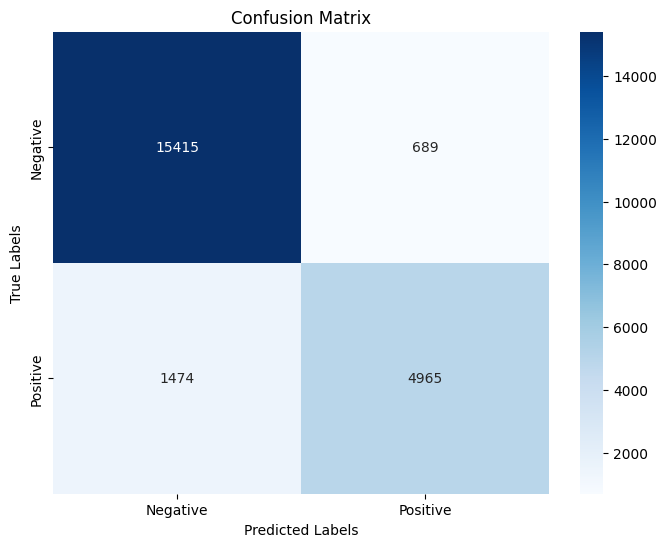

False Alarm Rate: 0.042784401390958765


In [246]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from joblib import dump

# Create an instance of the estimator (DecisionTreeClassifier)
estimator = DecisionTreeClassifier(random_state=88)

# Create an instance of the feature selector (RFE)
selector = RFE(estimator)  # Select features

# Fit the selector to the training data
selector.fit(x_train, y_train)

# Transform the training and testing data using the selected features
x_train_selected = selector.transform(x_train)
x_test_selected = selector.transform(x_test)



# Step 1: Define list of models
# Step 1: Define list of models
models = [ 
    DecisionTreeClassifier(random_state=88),
    RandomForestClassifier(random_state=88),
    RandomForestClassifier(n_estimators=130,max_depth=30,min_samples_leaf=9 , random_state=88),
    LogisticRegression(max_iter=500),
    GaussianNB(),
]

# Step 2: Define dictionary to store evaluation metrics
# Step 2: Define dictionary to store evaluation metrics

results = []
i=0
# fit models and make predictions
#models = [Rf,Rf_best_param, dt, svm,svm_best_param,Lr,NB,kNN,kNN_best_param]
model_names = [' DecisionTreeClassifier ','RandomForestClassifier', 'RandomForestClassifier With parameters','LogisticRegression ','Naive Bayes Classifier']
results = []
for model in models:
    model.fit(x_train_selected,y_train)
    y_pred = model.predict(x_test_selected)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    Conf_Mat = confusion_matrix(y_test, y_pred)
    dump(model, model_names[i]+' RFE FeautureSelection.joblib')
    i=i+1
    results.append([acc, prec, recall, f1,Conf_Mat])

# create dataframe with results
metrics_df_Columns_RFEF = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score','Confusion Matrix'], index=model_names)
print(metrics_df_Columns_RFEF)


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = Conf_Mat 

# Create a figure and axis
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# Show the plot
plt.show()

# Calculate the confusion matrix
tn, fp, fn, tp = Conf_Mat.ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)



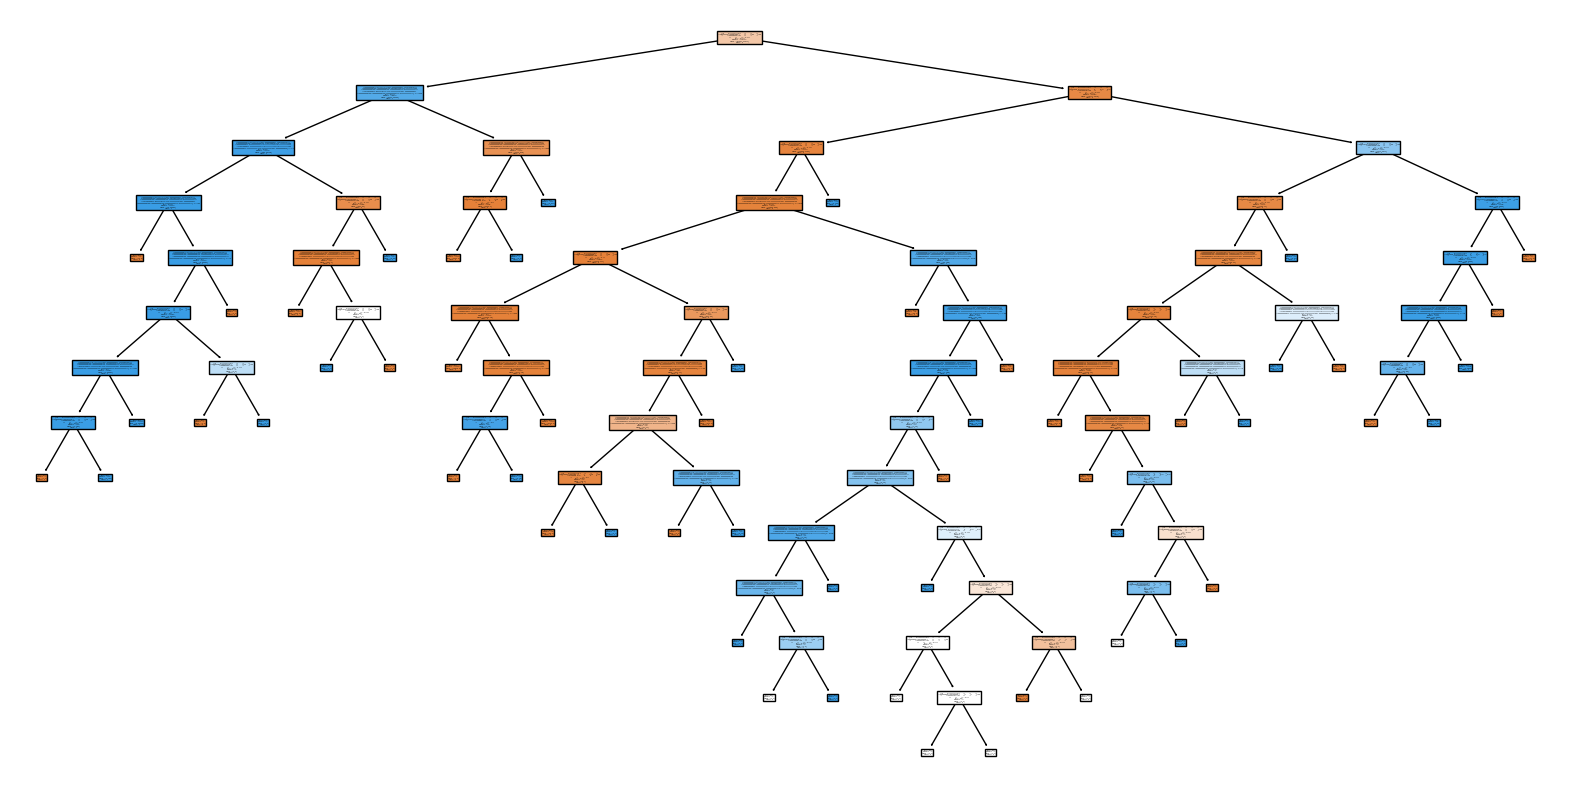

In [247]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(random_state=88)
model.fit(x_train_selected, y_train)

# Plot the decision tree using plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=x_train_selected, class_names=['0', '1'], filled=True)
plt.show()

# Save the decision tree as a .dot file
dot_file_path = 'decision_tree.dot'
export_graphviz(model, out_file=dot_file_path, filled=True)



In [248]:
# from sklearn.tree import DecisionTreeClassifier, export_graphviz
# import matplotlib.pyplot as plt

# model = DecisionTreeClassifier(random_state=88)
# model.fit(x_train_selected, y_train)

# # Get the selected feature indices
# selected_feature_indices = selector.get_support(indices=True)

# # Get the selected feature names
# selected_feature_names = x_train.columns[selected_feature_indices]

# # Export the decision tree as a .dot file
# export_graphviz(model, out_file='my_tree.dot', filled=True)

# # Plot the decision tree
# plt.figure(figsize=(20, 10))
# plt.imshow(plt.imread('my_tree.dot'))
# plt.axis('off')
# plt.show()


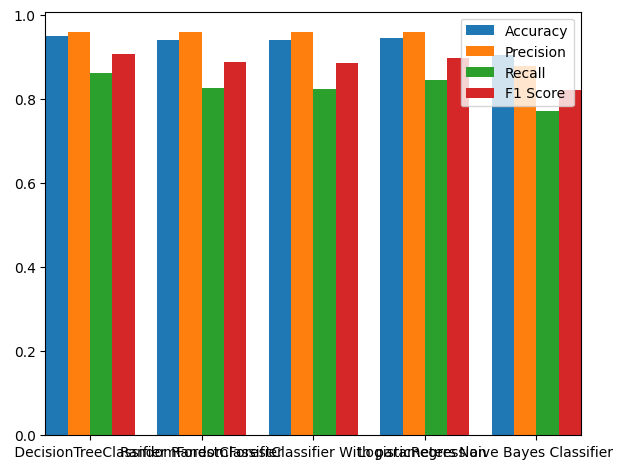

In [249]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the models and x-axis positions
models = model_names
x = np.arange(len(models))

# Define the width of each bar
width = 0.2

# Create the figure and axes
fig, ax = plt.subplots()

# Iterate over the columns
for i, column_name in enumerate(metrics_df_Columns_RFEF.columns[:-1]):  
    values = metrics_df_Columns_RFEF[column_name]

    # Plot the bars for each column
    rects = ax.bar(x + (i - 1.5) * width, values, width, label=column_name)

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models)

# Add legend
ax.legend()

# Add spacing between models
ax.set_xlim(x[0] - width * 2, x[-1] + width * 2)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# CFS(mutual_info_classif)

<Axes: >

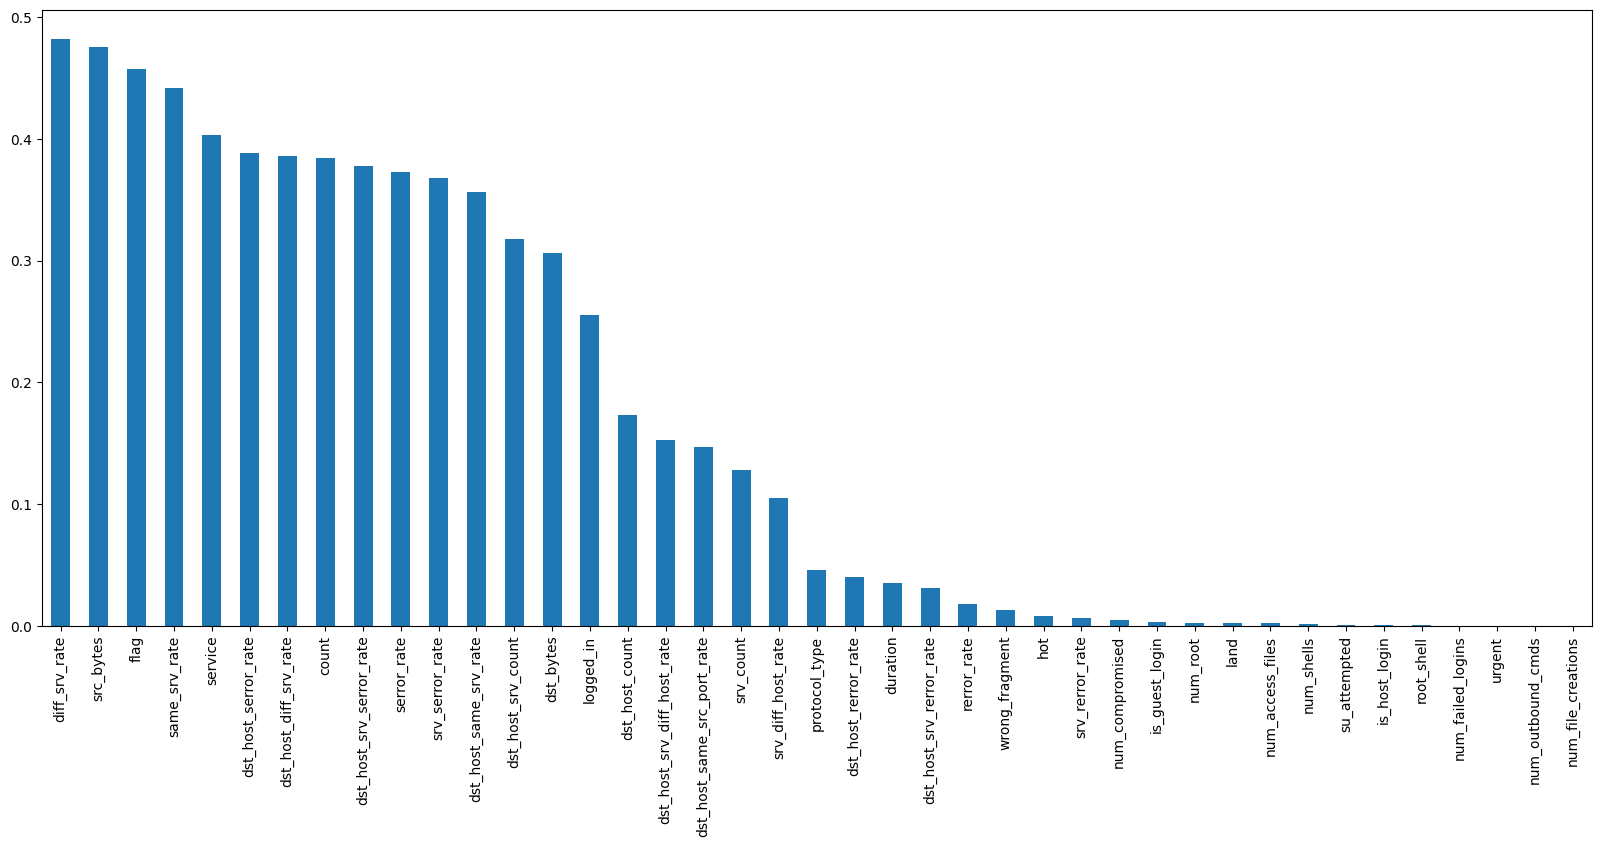

In [250]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [251]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif



# Feature selection using CFS
selector = SelectKBest(mutual_info_classif, k=19)
X_train_new = selector.fit_transform(x_train, y_train)
X_test_new = selector.transform(x_test)

# Get indices of selected features
selected_features_indices = selector.get_support(indices=True)

# Print selected features
selected_features = train.columns[selected_features_indices]
print("Selected features:", selected_features)

Selected features: Index(['service', 'flag', 'src_bytes', 'dst_bytes', 'logged_in', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate',
       'diff_srv_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate'],
      dtype='object')


                                        Accuracy  Precision    Recall  \
 DecisionTreeClassifier                 0.947035   0.949906  0.859916   
RandomForestClassifier                  0.942421   0.960911  0.832272   
RandomForestClassifier With parameters  0.943796   0.961456  0.836776   
LogisticRegression                      0.904094   0.858268  0.795620   
Naive Bayes Classifier                  0.863239   0.748005  0.785992   

                                        F1 Score  \
 DecisionTreeClassifier                 0.902674   
RandomForestClassifier                  0.891977   
RandomForestClassifier With parameters  0.894794   
LogisticRegression                      0.825758   
Naive Bayes Classifier                  0.766528   

                                                     Confusion Matrix  
 DecisionTreeClassifier                   [[15812, 292], [902, 5537]]  
RandomForestClassifier                   [[15886, 218], [1080, 5359]]  
RandomForestClassifier With para

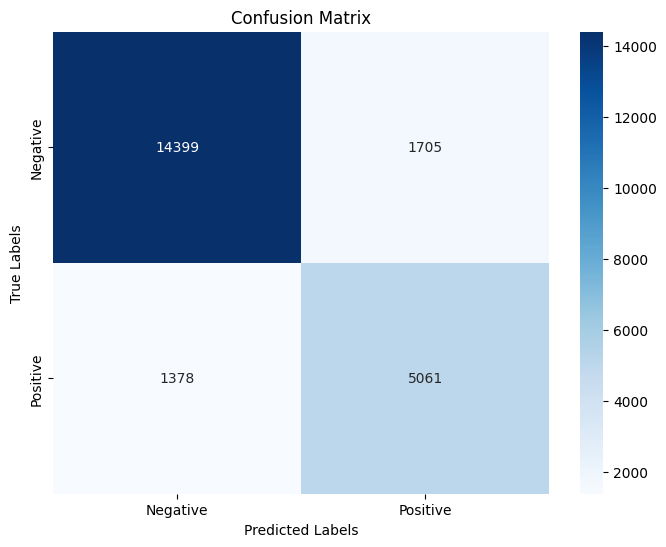

False Alarm Rate: 0.10587431693989072


In [252]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Step 1: Define list of models
# Step 1: Define list of models
models = [ 
    DecisionTreeClassifier(random_state=88),
    RandomForestClassifier(random_state=88),
    RandomForestClassifier(n_estimators=130,max_depth=30,min_samples_leaf=9 , random_state=88),
    LogisticRegression(max_iter=500),
    GaussianNB(),
]

# Step 2: Define dictionary to store evaluation metrics
# Step 2: Define dictionary to store evaluation metrics

results = []
i=0
# fit models and make predictions
#models = [Rf,Rf_best_param, dt, svm,svm_best_param,Lr,NB,kNN,kNN_best_param]
model_names = [' DecisionTreeClassifier ','RandomForestClassifier', 'RandomForestClassifier With parameters','LogisticRegression ','Naive Bayes Classifier']
results = []
for model in models:
    model.fit(X_train_new,y_train)
    y_pred = model.predict(X_test_new)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    Conf_Mat = confusion_matrix(y_test, y_pred)
    dump(model, model_names[i]+' RFE FeautureSelection.joblib')
    i=i+1
    results.append([acc, prec, recall, f1,Conf_Mat])

# create dataframe with results
metrics_df_Columns_CFSF = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score','Confusion Matrix'], index=model_names)
print(metrics_df_Columns_CFSF)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = Conf_Mat 

# Create a figure and axis
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# Show the plot
plt.show()

# Calculate the confusion matrix
tn, fp, fn, tp = Conf_Mat.ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)



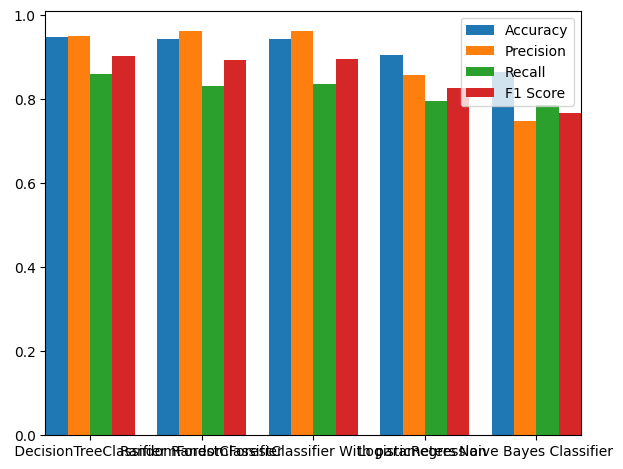

In [253]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the models and x-axis positions
models = model_names
x = np.arange(len(models))

# Define the width of each bar
width = 0.2

# Create the figure and axes
fig, ax = plt.subplots()

# Iterate over the columns
for i, column_name in enumerate(metrics_df_Columns_CFSF.columns[:-1]):  
    values = metrics_df_Columns_CFSF[column_name]

    # Plot the bars for each column
    rects = ax.bar(x + (i - 1.5) * width, values, width, label=column_name)

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models)

# Add legend
ax.legend()

# Add spacing between models
ax.set_xlim(x[0] - width * 2, x[-1] + width * 2)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# Embedded Methods

### chi2

<Axes: >

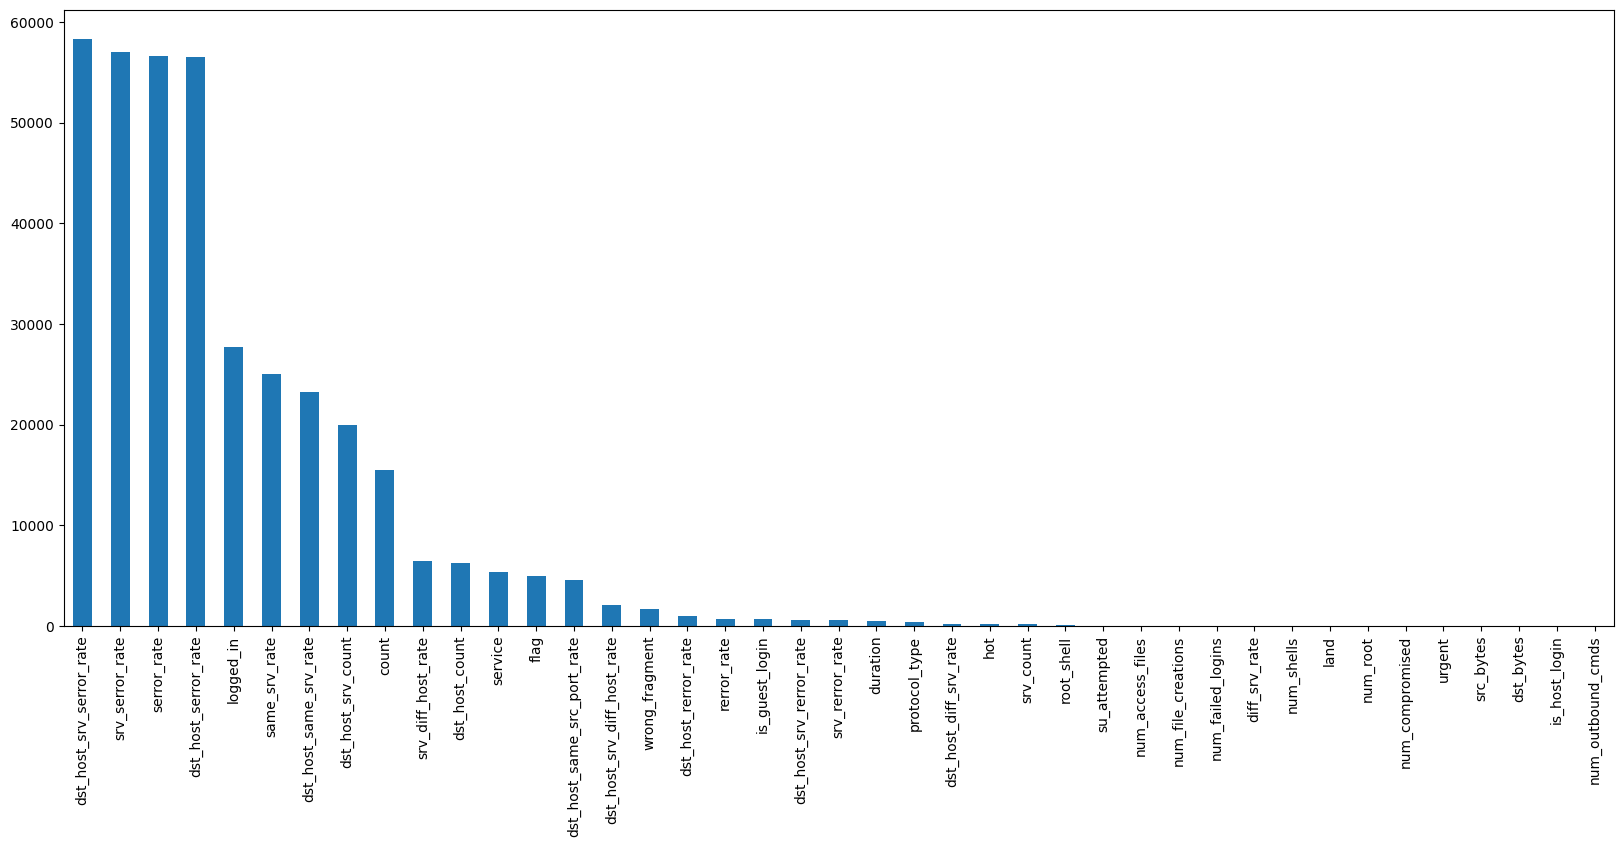

In [254]:
from sklearn.feature_selection import chi2

chi_scores, p_values = chi2(x_train, y_train)
chi_scores = pd.Series(chi_scores)
p_values = pd.Series(p_values)
chi_scores.index = p_values.index = x_train.columns
chi_scores.sort_values(ascending=False)
chi_scores.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [255]:
from sklearn.feature_selection import SelectKBest

# Feature extraction
selector = SelectKBest(score_func=chi2, k=17)
X_train_new = selector.fit_transform(x_train, y_train)
X_test_new = selector.transform(x_test)
# Get indices of selected features
selected_features_indices = selector.get_support(indices=True)

# Print selected features
selected_features = train.columns[selected_features_indices]
print("Selected features:", selected_features)

Selected features: Index(['service', 'flag', 'wrong_fragment', 'logged_in', 'count',
       'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate'],
      dtype='object')


                                        Accuracy  Precision    Recall  \
 DecisionTreeClassifier                 0.949297   0.957340  0.860848   
RandomForestClassifier                  0.929335   0.958902  0.786302   
RandomForestClassifier With parameters  0.934614   0.960148  0.804473   
LogisticRegression                      0.869849   0.801687  0.723249   
Naive Bayes Classifier                  0.891097   0.825916  0.783973   

                                        F1 Score  \
 DecisionTreeClassifier                 0.906534   
RandomForestClassifier                  0.864067   
RandomForestClassifier With parameters  0.875444   
LogisticRegression                      0.760451   
Naive Bayes Classifier                  0.804398   

                                                     Confusion Matrix  
 DecisionTreeClassifier                   [[15857, 247], [896, 5543]]  
RandomForestClassifier                   [[15887, 217], [1376, 5063]]  
RandomForestClassifier With para

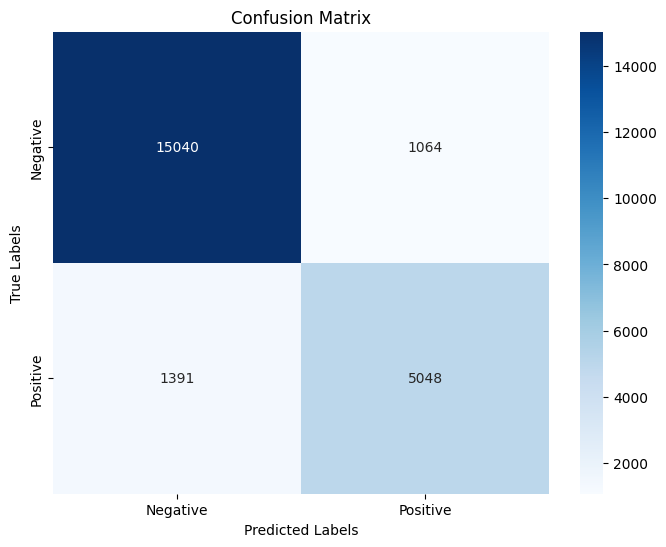

False Alarm Rate: 0.06607054148037754


In [256]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Step 1: Define list of models
# Step 1: Define list of models
models = [ 
    DecisionTreeClassifier(random_state=88),
    RandomForestClassifier(random_state=88),
    RandomForestClassifier(n_estimators=130,max_depth=30,min_samples_leaf=9 , random_state=88),
    LogisticRegression(max_iter=500),
    GaussianNB(),
]

# Step 2: Define dictionary to store evaluation metrics
# Step 2: Define dictionary to store evaluation metrics

results = []
i=0
# fit models and make predictions
#models = [Rf,Rf_best_param, dt, svm,svm_best_param,Lr,NB,kNN,kNN_best_param]
model_names = [' DecisionTreeClassifier ','RandomForestClassifier', 'RandomForestClassifier With parameters','LogisticRegression ','Naive Bayes Classifier']
results = []
for model in models:
    model.fit(X_train_new,y_train)
    y_pred = model.predict(X_test_new)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    Conf_Mat = confusion_matrix(y_test, y_pred)
    dump(model, model_names[i]+' RFE FeautureSelection.joblib')
    i=i+1
    results.append([acc, prec, recall, f1,Conf_Mat])

# create dataframe with results
metrics_df_Columns_CHI2F = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score','Confusion Matrix'], index=model_names)
print(metrics_df_Columns_CHI2F)


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = Conf_Mat 

# Create a figure and axis
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# Show the plot
plt.show()

# Calculate the confusion matrix
tn, fp, fn, tp = Conf_Mat.ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)


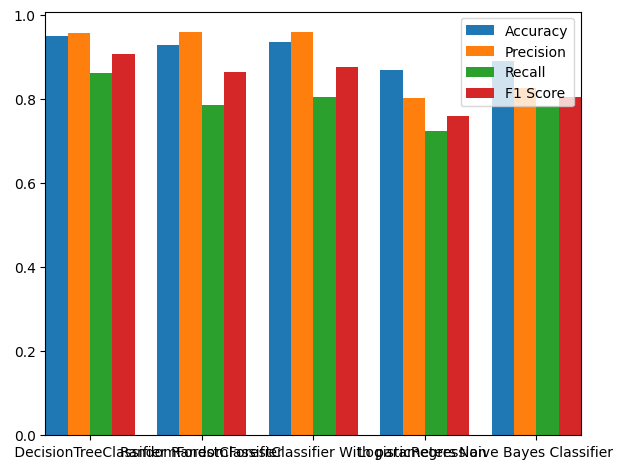

In [257]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the models and x-axis positions
models = model_names
x = np.arange(len(models))

# Define the width of each bar
width = 0.2

# Create the figure and axes
fig, ax = plt.subplots()

# Iterate over the columns
for i, column_name in enumerate(metrics_df_Columns_CHI2F.columns[:-1]):  
    values = metrics_df_Columns_CHI2F[column_name]

    # Plot the bars for each column
    rects = ax.bar(x + (i - 1.5) * width, values, width, label=column_name)

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models)

# Add legend
ax.legend()

# Add spacing between models
ax.set_xlim(x[0] - width * 2, x[-1] + width * 2)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# features selection using linear regression

In [258]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


# Define the number of features to select
k = 25

# Select k best features based on Pearson's correlation coefficient
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(x_train, y_train)

# Get the indices of the selected features
selected_features = selector.get_support(indices=True)



                                        Accuracy  Precision    Recall  \
 DecisionTreeClassifier                 0.947611   0.957058  0.854946   
RandomForestClassifier                  0.929069   0.959203  0.785060   
RandomForestClassifier With parameters  0.933106   0.959896  0.799192   
LogisticRegression                      0.938606   0.937966  0.840658   
Naive Bayes Classifier                  0.886040   0.814021  0.779003   

                                        F1 Score  \
 DecisionTreeClassifier                 0.903125   
RandomForestClassifier                  0.863438   
RandomForestClassifier With parameters  0.872203   
LogisticRegression                      0.886650   
Naive Bayes Classifier                  0.796127   

                                                     Confusion Matrix  
 DecisionTreeClassifier                   [[15857, 247], [934, 5505]]  
RandomForestClassifier                   [[15889, 215], [1384, 5055]]  
RandomForestClassifier With para

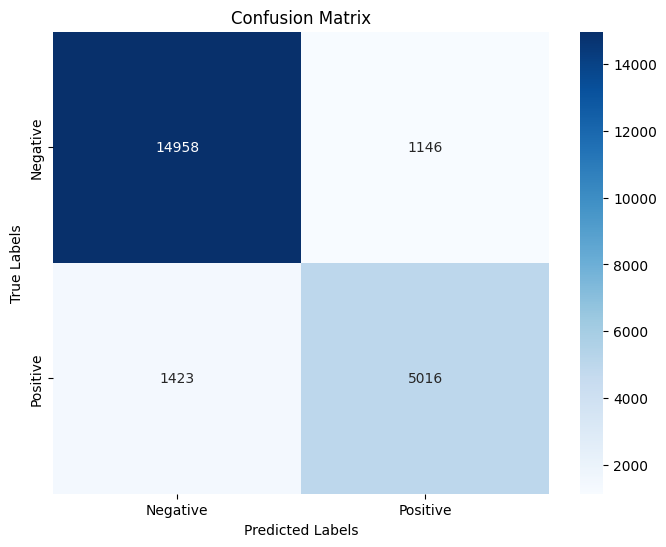

False Alarm Rate: 0.07116244411326378


In [259]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Step 1: Define list of models
# Step 1: Define list of models
models = [ 
    DecisionTreeClassifier(random_state=88),
    RandomForestClassifier(random_state=88),
    RandomForestClassifier(n_estimators=130,max_depth=30,min_samples_leaf=9 , random_state=88),
    LogisticRegression(max_iter=500),
    GaussianNB(),
]

# Step 2: Define dictionary to store evaluation metrics
# Step 2: Define dictionary to store evaluation metrics

results = []
i=0
# fit models and make predictions
#models = [Rf,Rf_best_param, dt, svm,svm_best_param,Lr,NB,kNN,kNN_best_param]
model_names = [' DecisionTreeClassifier ','RandomForestClassifier', 'RandomForestClassifier With parameters','LogisticRegression ','Naive Bayes Classifier']
results = []
for model in models:
    model.fit(x_train.iloc[:, selected_features],y_train)
    y_pred = model.predict(x_test.iloc[:, selected_features])
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    Conf_Mat = confusion_matrix(y_test, y_pred)
    dump(model, model_names[i]+' RFE FeautureSelection.joblib')
    i=i+1
    results.append([acc, prec, recall, f1,Conf_Mat])

# create dataframe with results
metrics_df_Columns_LGF = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score','Confusion Matrix'], index=model_names)
print(metrics_df_Columns_LGF)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = Conf_Mat 

# Create a figure and axis
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# Show the plot
plt.show()

# Calculate the confusion matrix
tn, fp, fn, tp = Conf_Mat.ravel()

# Calculate the false alarm rate
false_alarm_rate = fp / (fp + tn)
print('False Alarm Rate:', false_alarm_rate)



In [260]:

# Import the necessary libraries
# Write each dataframe to a different sheet in the same Excel file
from IPython.display import FileLink

# Write each dataframe to a different sheet in the same Excel file
with pd.ExcelWriter('metrics-NSL-KDD.xlsx', engine='openpyxl') as writer:
    metrics_df_Columns_WN.iloc[:, 0:4].to_excel(writer, sheet_name='NSL-KDD-Non Normalisation', startrow=0, startcol=8)
    metrics_df_Columns_N.iloc[:, 0:4].to_excel(writer, sheet_name='NSL-KDD-Normalisation', startrow=0, startcol=8)
    metrics_df_Columns_RFF.iloc[:, 0:4].to_excel(writer, sheet_name='NSL-KDD-RF feature s', startrow=0, startcol=8)
    metrics_df_Columns_RFEF.iloc[:, 0:4].to_excel(writer, sheet_name='NSL-KDD-RFE feature s', startrow=0, startcol=8)
    metrics_df_Columns_CFSF.iloc[:, 0:4].to_excel(writer, sheet_name='NSL-KDD-CFS feature s', startrow=0, startcol=8)
    metrics_df_Columns_CHI2F.iloc[:, 0:4].to_excel(writer, sheet_name='NSL-KDD-CHI2 feature s', startrow=0, startcol=8)
    metrics_df_Columns_LGF.iloc[:, 0:4].to_excel(writer, sheet_name='NSL-KDD-Linear reg feature s', startrow=0, startcol=8)

# Generate a download link for the Excel file
FileLink('metrics-NSL-KDD.xlsx')






C:\Users\Dell\Documents\Projet-2cs\2CS_Project\metrics-NSL-KDD.xlsx